In [1]:
import numpy as np
import pandas as pd
import timeit
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from main import MeasurementControlEnvironment

### Create Game Environment and RL Wrapper (This initializes NN at random)

After reset observed:
0     [False, False, False, False]
1     [False, False, False, False]
2     [False, False, False, False]
3     [False, False, False, False]
4     [False, False, False, False]
5     [False, False, False, False]
6     [False, False, False, False]
7     [False, False, False, False]
8     [False, False, False, False]
9     [False, False, False, False]
10    [False, False, False, False]
11    [False, False, False, False]
12    [False, False, False, False]
13    [False, False, False, False]
Name: observed, dtype: object
Observable indices for OOI 3.0: [0 1 3]
After update: [ True  True False  True]
Observable indices for OOI 1.0: [0 1 3]
After update: [ True  True False  True]
Observable indices for OOI 0.0: [0 3]
After update: [ True False False  True]
Toy Measurement Control Initialized
Using device: cuda
Model loaded


,object_type,shape,mean,ooi_id,points,covariances,radius,observed,in_collision
0,obstacle,circle,"[76.80763295490996, 56.97527382673706]",NaN,None,None,1.030671,"[False, False, False, False]",False
1,obstacle,circle,"[84.90856101650013, 20.9226261204458]",NaN,None,None,3.543386,"[False, False, False, False]",False
2,obstacle,circle,"[17.255246250639512, 34.69185434491301]",NaN,None,None,5.945912,"[False, False, False, False]",False
3,obstacle,circle,"[66.62219511884788, 23.748135175801863]",NaN,None,None,8.993912,"[False, False, False, False]",False
4,obstacle,circle,"[58.69470672460615, 60.332582292614525]",NaN,None,None,7.451653,"[False, False, False, False]",False
5,occlusion,circle,"[82.78842421030762, 38.9871824527078]",NaN,None,None,5.815453,"[False, False, False, False]",False
6,occlusion,circle,"[19.366430843429995, 78.32619966042749]",NaN,None,None,4.807608,"[False, False, False, False]",False
7,occlusion,circle,"[63.73724185714134, 45.29080065632175]",NaN,None,None,2.875473,"[False, False, False, False]",False
8,occlusion,circle,"[41.684117865313986, 66.36461508208701]",NaN,None,None,9.371019,"[False, False, False, False]",False
9,occlusion,circle,"[77.76246244561088, 74.92571410531465]",NaN,None,None,1.813289,"[False, False, False, False]",False


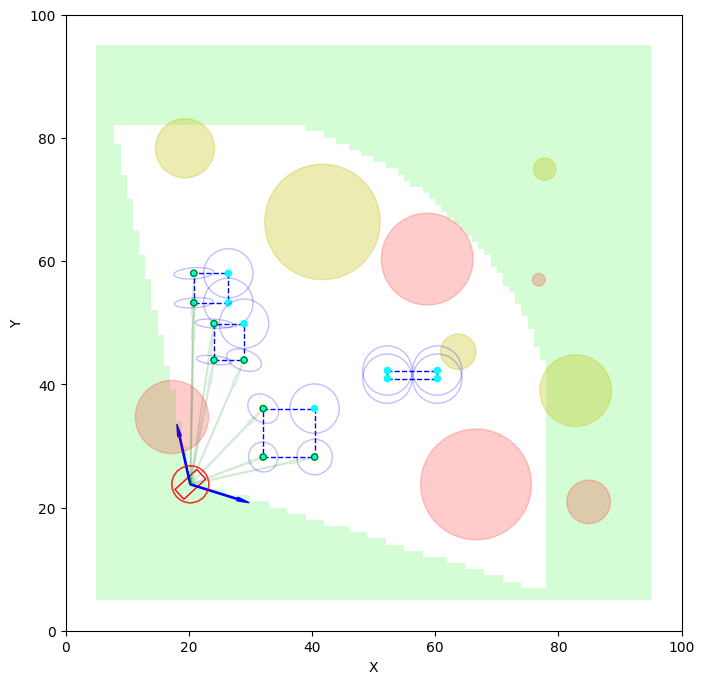

In [5]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment()
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)
env.draw_state(env.get_state())

In [32]:
# Get the original dataframe
df = env.object_manager.get_df()
display(df)

# Make sure the DataFrame column can handle objects
df['points'] = df['points'].astype(object)

# Get the index of the row where 'ooi_id' is 1
index = df.loc[df['ooi_id'] == 1].index[0]

# Set the value directly using .loc[]
print(df.loc[index, 'points'].shape)
print(df.loc[index, 'points'])
df.at[index, 'points'] = np.ones((4, 2))
display(df)

# new_object_df.at[new_object_df.index[new_object_df['ooi_id'] == ooi_id].tolist()[0], 'points'] = means

# df.query('ooi_id == 1')['mean'].values[0]
# df.loc[df['ooi_id'] == 1, 'points'].iloc[0] = np.ones((4,2))
# df.loc[df['ooi_id'] == 1, 'points'].iloc[0]

# # Extract the row corresponding to a specific ooi_id
# ooi_row = df.loc[df['ooi_id'] == 1]

# # Display the original row
# display(ooi_row.head())

# # Print the original means
# print("Original means:", ooi_row['points'].to_numpy()[0])

# # Create new means
# new_means = np.ones((4,2))
# print('New means: ', new_means)

# # Create new covs
# new_covs = [np.ones((2,2))] * 4
# print('New covs: ', new_covs)

# # Now, directly assign the new means back to the original dataframe
# df.at[df.index[df['ooi_id'] == 1].tolist()[0], 'points'] = new_means
# df.at[df.index[df['ooi_id'] == 1].tolist()[0], 'covariances'] = new_covs

# # Display the modified row to verify the changes
# display(df.loc[df['ooi_id'] == 1])


,object_type,shape,mean,ooi_id,points,covariances,radius
0,obstacle,circle,"[62.4525087523481, 63.08420704428096]",NaN,None,None,6.670782
1,obstacle,circle,"[40.901165139272535, 57.12479300786718]",NaN,None,None,3.292282
2,obstacle,circle,"[18.10606756256878, 31.769434316398502]",NaN,None,None,7.576921
3,obstacle,circle,"[39.42953587425595, 34.56192895886595]",NaN,None,None,5.855186
4,obstacle,circle,"[67.773363508882, 46.60608382586329]",NaN,None,None,9.549965
5,occlusion,circle,"[79.15292245199348, 61.004440314373305]",NaN,None,None,1.548333
6,occlusion,circle,"[30.060913452643284, 77.18426499410488]",NaN,None,None,3.936069
7,occlusion,circle,"[24.765824306123186, 16.0846818576814]",NaN,None,None,5.047073
8,occlusion,circle,"[44.74826370608514, 70.78690337956105]",NaN,None,None,9.628617
9,occlusion,circle,"[80.57525005007015, 26.69351750495118]",NaN,None,None,1.619020


(4, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


,object_type,shape,mean,ooi_id,points,covariances,radius
0,obstacle,circle,"[62.4525087523481, 63.08420704428096]",NaN,None,None,6.670782
1,obstacle,circle,"[40.901165139272535, 57.12479300786718]",NaN,None,None,3.292282
2,obstacle,circle,"[18.10606756256878, 31.769434316398502]",NaN,None,None,7.576921
3,obstacle,circle,"[39.42953587425595, 34.56192895886595]",NaN,None,None,5.855186
4,obstacle,circle,"[67.773363508882, 46.60608382586329]",NaN,None,None,9.549965
5,occlusion,circle,"[79.15292245199348, 61.004440314373305]",NaN,None,None,1.548333
6,occlusion,circle,"[30.060913452643284, 77.18426499410488]",NaN,None,None,3.936069
7,occlusion,circle,"[24.765824306123186, 16.0846818576814]",NaN,None,None,5.047073
8,occlusion,circle,"[44.74826370608514, 70.78690337956105]",NaN,None,None,9.628617
9,occlusion,circle,"[80.57525005007015, 26.69351750495118]",NaN,None,None,1.619020


In [30]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2]})

# Create a NumPy array
arr = np.array([10, 20])
arr2 = np.ones((2,))

# Assign the array to a new column
df['B'] = arr
df['B'] = arr2
print(df)

   A    B
0  1  1.0
1  2  1.0


In [6]:
df = env.object_manager.get_df()
ooi_row = df.loc[df['ooi_id'] == 1]
display(ooi_row.head())
print(ooi_row['points'].to_numpy()[0])
means = np.ones((4,2))

print('new means: ', means)
# df.loc[df['ooi_id'] == 1, 'points'].to_numpy()[0] = means
ooi_row['points'].values[0] = means
display(ooi_row.head())

display(df.loc[df['ooi_id'] == 1])


,object_type,shape,mean,ooi_id,points,covariances,radius
11,ooi,4polygon,"[83.4318381472537, 75.65040955227718]",1.0,"[[82.12949501788356, 70.86479388688872], [84.7...","[[[8.0, 0.0], [0.0, 8.0]], [[8.0, 0.0], [0.0, ...",4.959659


[[82.12949502 70.86479389]
 [84.73418128 70.86479389]
 [84.73418128 80.43602522]
 [82.12949502 80.43602522]]
new means:  [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


,object_type,shape,mean,ooi_id,points,covariances,radius
11,ooi,4polygon,"[83.4318381472537, 75.65040955227718]",1.0,"[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]","[[[8.0, 0.0], [0.0, 8.0]], [[8.0, 0.0], [0.0, ...",4.959659


,object_type,shape,mean,ooi_id,points,covariances,radius
11,ooi,4polygon,"[83.4318381472537, 75.65040955227718]",1.0,"[[82.12949501788356, 70.86479388688872], [84.7...","[[[8.0, 0.0], [0.0, 8.0]], [[8.0, 0.0], [0.0, ...",4.959659


### Run the search

In [3]:
# Get starting state
state = env.get_state()
print(f'Starting car state: {state[0]}')
# rl.plot_state_image(state)

print('Starting MCTS search...')
start_time = timeit.default_timer()
best_action_idx, root = mcts_search(env, rl, state, learning_iterations=1000,
                                    explore_factor=0.5, discount_factor=0.9)
print(f'Finished in {timeit.default_timer() - start_time} seconds')

Starting car state: [21.65216864 58.5892333   0.         -1.56302723  0.          0.        ]
Starting MCTS search...
Finished in 5.7993146360004175 seconds


### Plot (also open tree_visualization.html in browser)

Making tree visualization, this takes a while for a large tree...
Plotting starting state with search tree overlayed...
Getting best action trajectory...
Actions in best trajectory:
[[-1.   -1.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.   

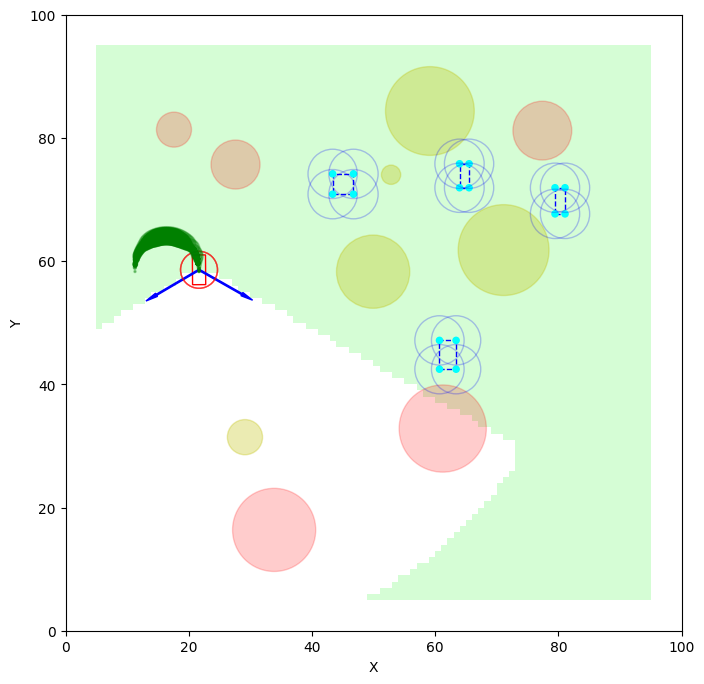

In [4]:
# Create the tree visualization html file
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.action_space, show_unsimulated=False)

# Plot the starting state with the search tree overlayed
print('Plotting starting state with search tree overlayed...')
env.draw_state(state, plot_explore_grid=True, root_node=root, scaling=4, bias=0.1, max=1., rew=True)

# Get the action trajectory
print('Getting best action trajectory...')
actions = get_best_action_trajectory(root, highest_Q=True)
print(f'Actions in best trajectory:\n{np.array(actions)}')
truncated_actions = actions[:10]
env.draw_action_set(root, truncated_actions)